Bucket Sort
-------------
## Algorithms and Programming Languages Exam: Problem 2
### Nick Creel - Apr 13, 2020 - MIT License

Sources used:
Simple Linear Regression in Python
https://medium.com/@mjfstanford/simple-linear-regression-in-python-905b759ef0e6
Bucket Sort
https://en.wikipedia.org/wiki/Bucket_sort

I wrote my bucket sort code using Javascript, which will not run in this notebook. You may find the code in the bucketsort.js file. The output of that code was stored in bucketsort.csv, which contains the number of elements in an array sorted by this bucket sort, as well as the run time in milliseconds. I wanted to run tests with larger lists, but the javascript call stack was not happy and I kept getting overflow errors. This bucket sort could theoretically sort lists with more than a million elements, if memory allowed. I suspect that increasing the ceiling of possible values (so, raising the cap over 1000 on the random number generator) would slow the sort down, as the bucket sort function would have to create a larger number of buckets. 

The speed of this bucketsort depends on the values of two numbers: n, which is the number of elements in a list, and m, which is the number of buckets needed to sort that list. As it stands, my bucket sort creates as many buckets needed so that every possible value in the list has its own bucket; this is accomplished by running a for loop that loops up until the maximum value contained in the list, in this case 1000. So, if the max is 1000, there would be 1000 buckets, and the number 750 would have its own bucket, and so on. With this algorithm, the sort only needs to iterate over the list once and dump each value into its bucket. This is much faster than the bubble sort, which, in the worst case, would have to iterate over a list with 30,000 elements up to 30,000 times. 

according to wikipedia, the O() behavior of the bucket sort algorithm is O(n<sup>2</sup>) in the worst case, but the average case is o(n+(n^2/k)+k). where n is the number of elements in the list and k is the number of buckets. because this average case is dependent on the number of buckets, I ran multiple tests where I changed the cap of the random number generator between 1,000 and 1,000,000, increasing the maximum number of buckets. I then analyze these different cases using the same methods I used when analyzing the bubble sort. 


In [56]:
# for help with importing csv files, I consulted the python documentation for csv.py
# https://docs.python.org/3/library/csv.html
import csv

def unpackCSV(filename):
    """this function takes the filename of a csv file as input and returns a tuple containing two lists.
       the first list is the number of elements, the second is the runtime in milliseconds."""
    with open(filename, newline='\r\n') as csvfile:
        runtime = []
        elements = []
        fieldnames = ["elements", "runtime_ms", "buckets"]
        test = csv.DictReader(csvfile, fieldnames=fieldnames, delimiter=',')
        for row in test:
            runtime.append(float(row['runtime_ms'].strip('\"')))
            elements.append(float(row['elements'].strip('\"')))
        return (elements, runtime)
    
# we need lots of x and y values!
# the number at the end of each variable is the number of buckets (k)
elements1000, runtime1000 = unpackCSV('bucketsort1000.csv')
elements3000, runtime3000 = unpackCSV('bucketsort3000.csv')
elements10000, runtime10000 = unpackCSV('bucketsort10000.csv')
elements30000, runtime30000 = unpackCSV('bucketsort30000.csv')
elements100000, runtime100000 = unpackCSV('bucketsort100000.csv')
elements300000, runtime300000 = unpackCSV('bucketsort300000.csv')
elements1000000, runtime1000000 = unpackCSV('bucketsort1000000.csv')

#FOR PLOTTING: runtime is x, num of elements is y. buckets will make the lines different colors. 

Because the behavior of the sorting algorithm was made more complex by the two different variables n and k, and because this analysis required generating much more data than the bubble sort algorithm, I decided to use a linear regression function to find the lines of best fit, rather than attempting to calculate the lines myself or estimating them visually. Rather than using a library, I found a very simple explanation of [linear regression written by Matt Stanford which was accompanied by some simple python code.](https://medium.com/@mjfstanford/simple-linear-regression-in-python-905b759ef0e6) The code for the linReg function is entirely original code written by Stanford, except for the np.dot(m,x), which I debugged by reading [this Stack Overflow article about matrix multiplication](https://stackoverflow.com/questions/24560298/python-numpy-valueerror-operands-could-not-be-broadcast-together-with-shapes)

In [136]:
def linReg(x, y):
    '''simple linear regression function to find line of best fit.
       code originall written by Matt Stanford and shared via the
       Simple Linear Regression in Python article linked at the start
       of this notebook.
    '''
    x = np.array(x)
    y = np.array(y)
    denominator = x.dot(x) - x.mean() * x.sum()
    m = (x.dot(y) - y.mean() * x.sum()) / denominator
    b = (y.mean() * x.dot(x)- x.mean() * x.dot(y)) / denominator
    y_pred = np.dot(m,x) + b
    return y_pred

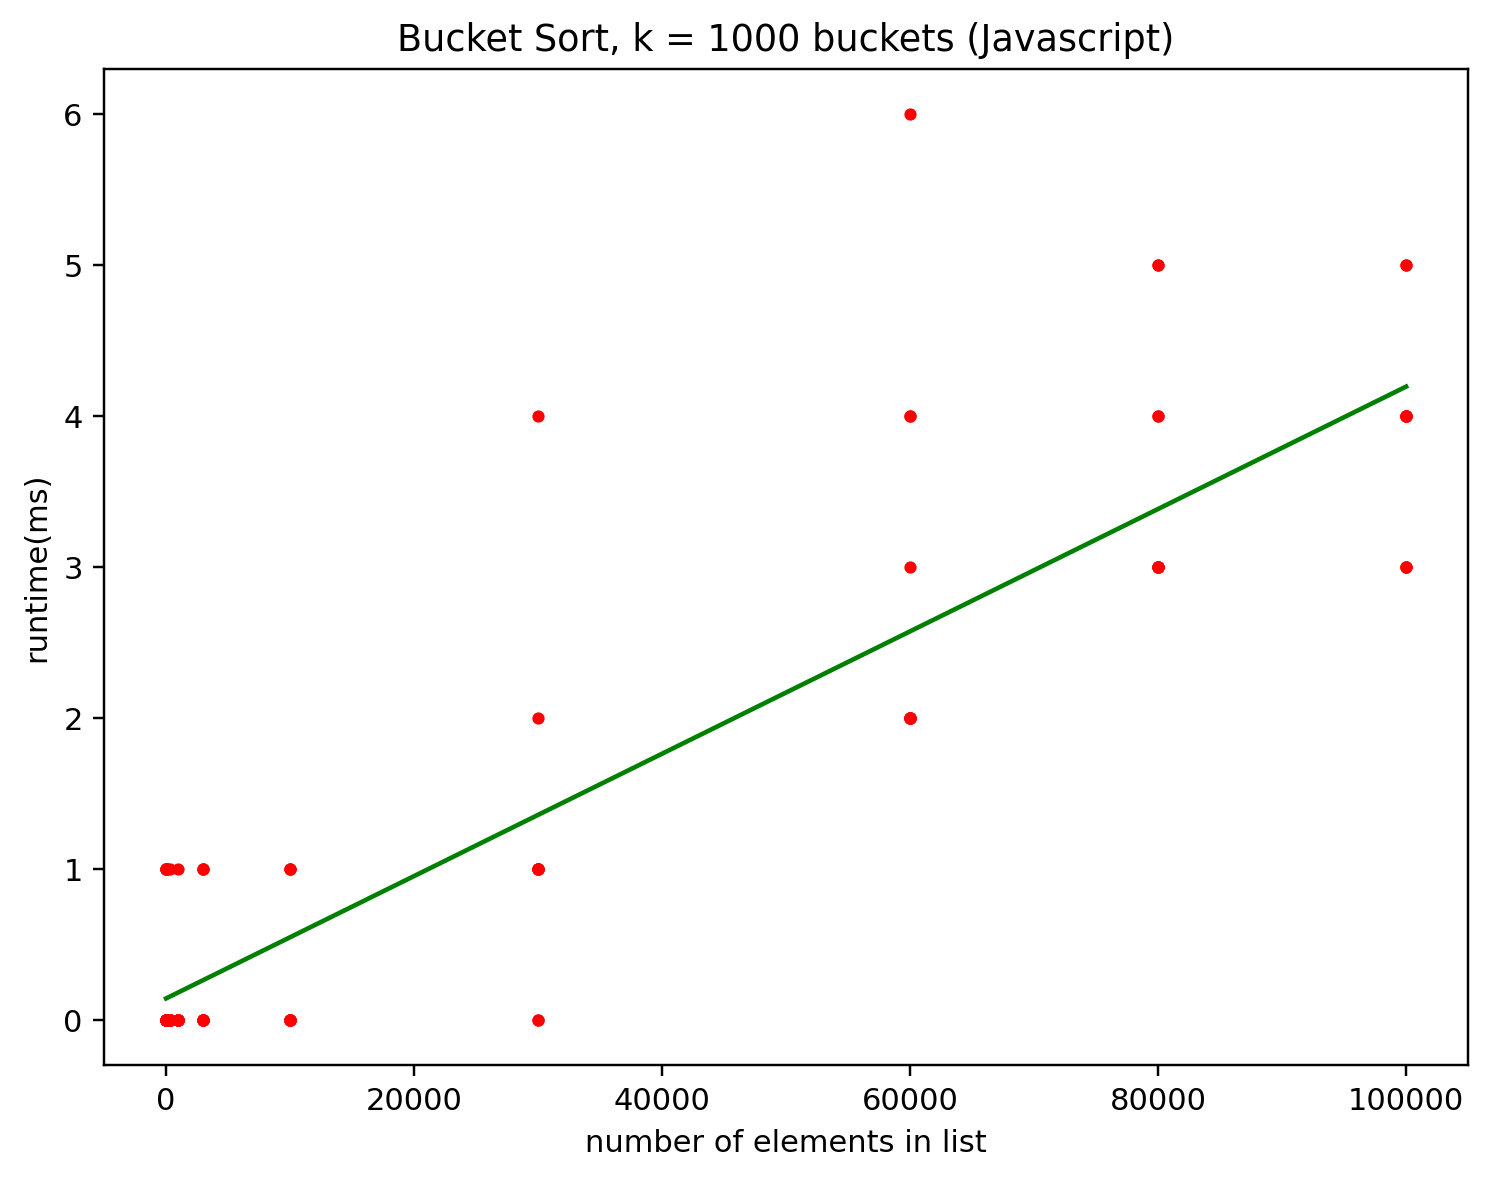

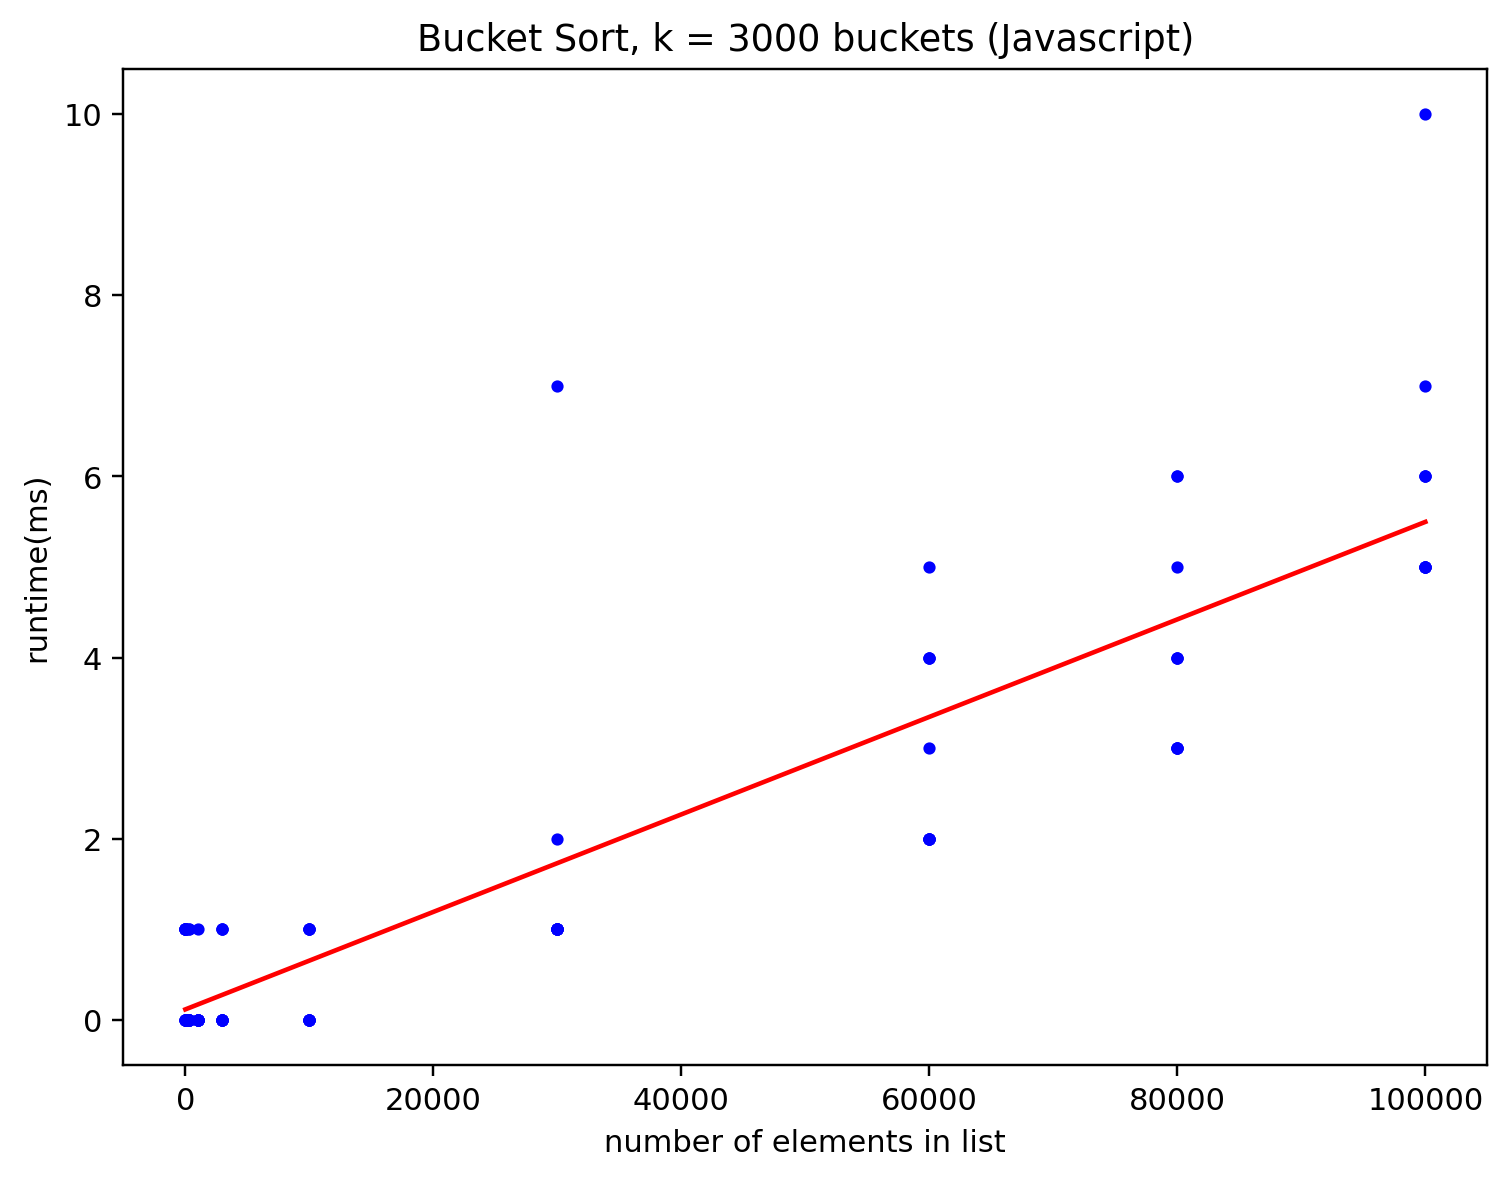

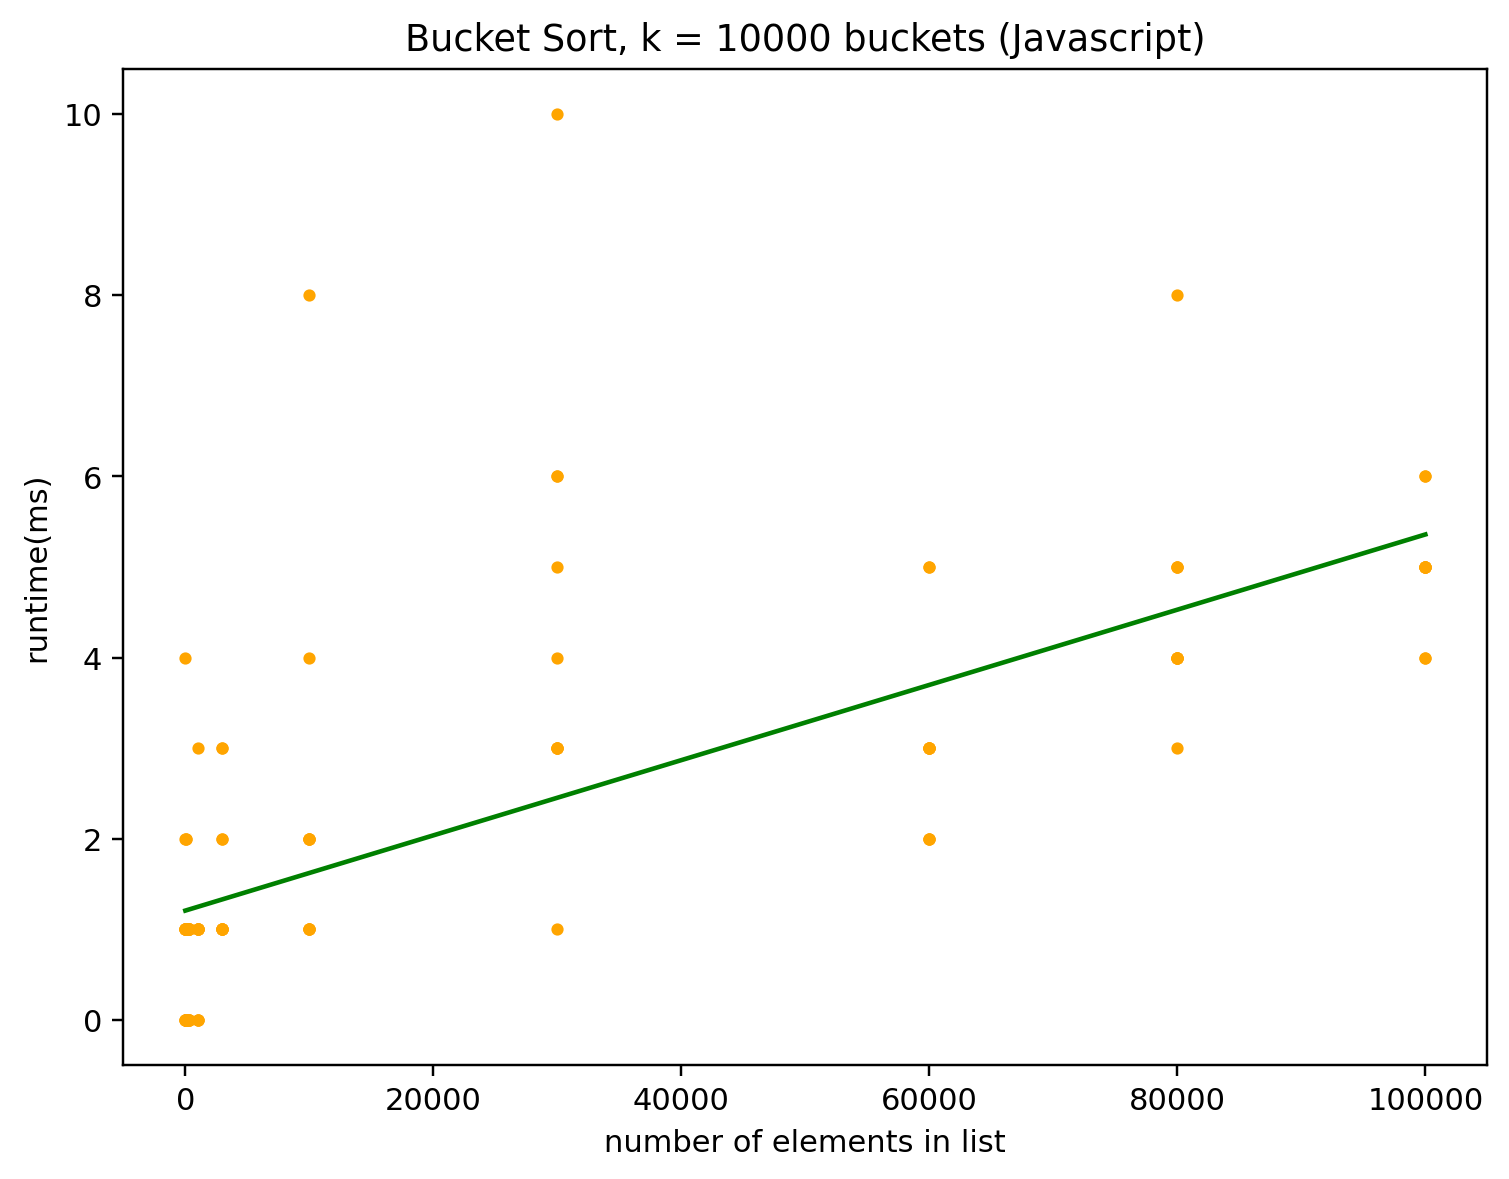

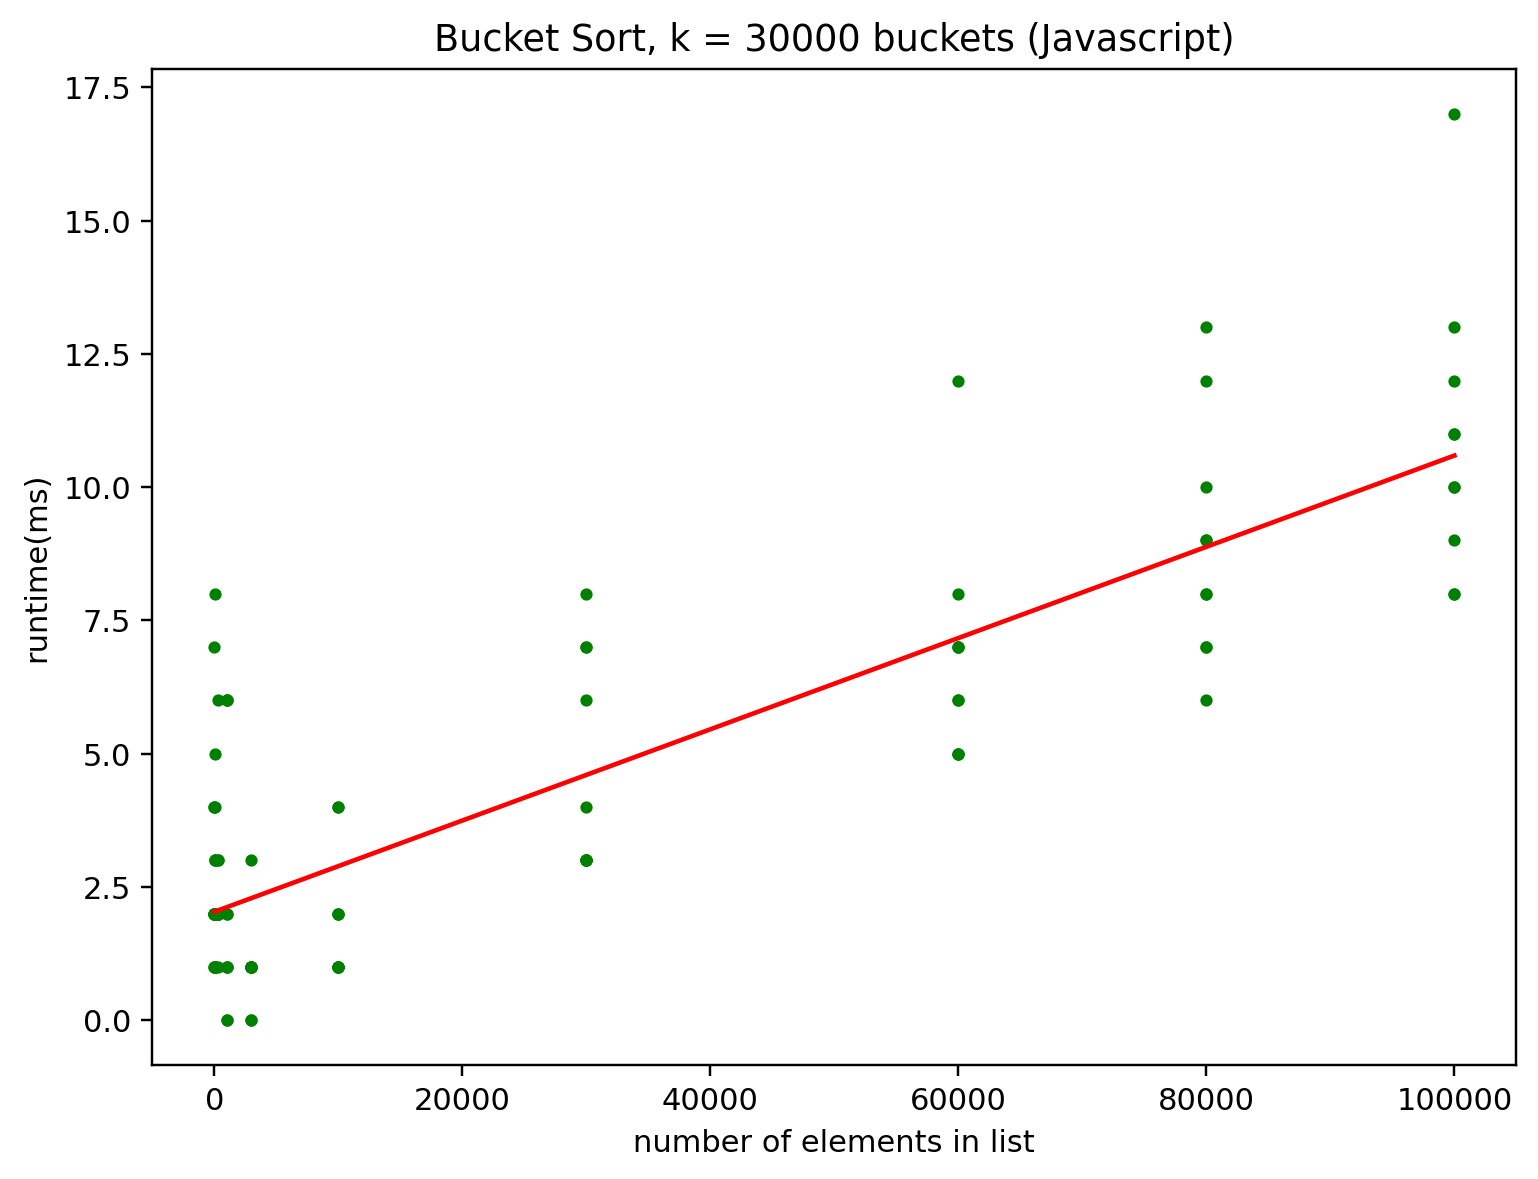

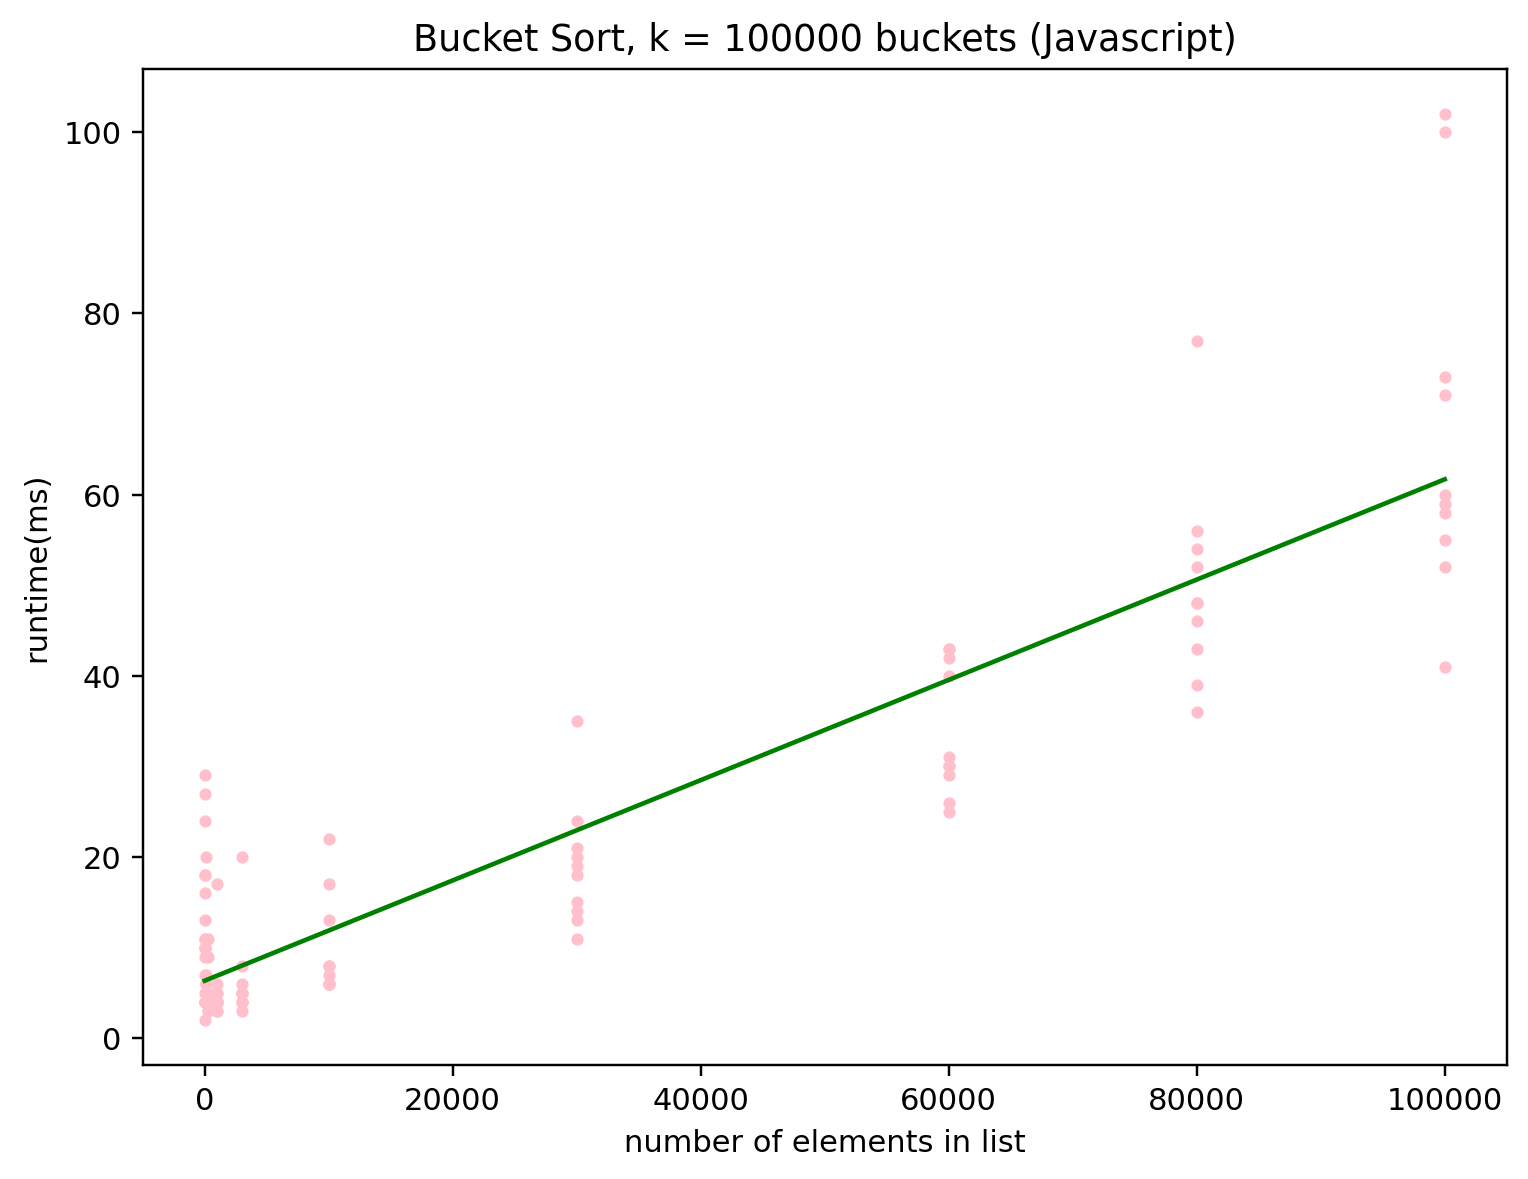

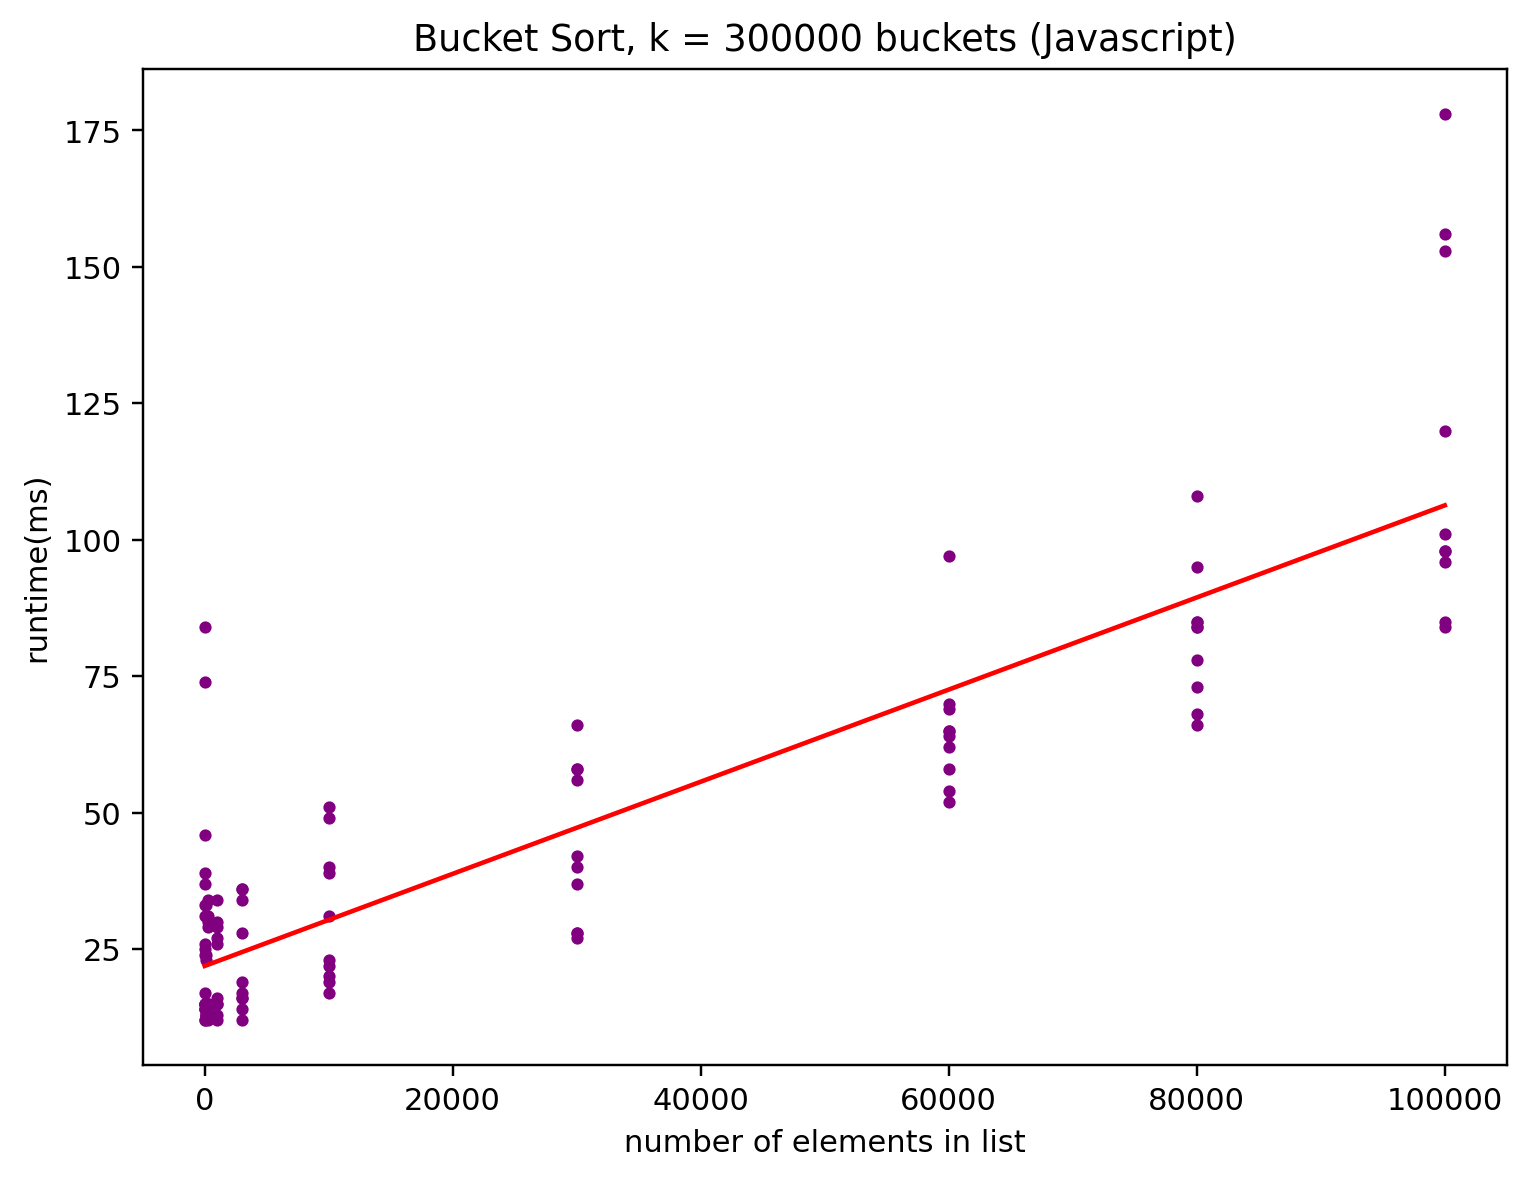

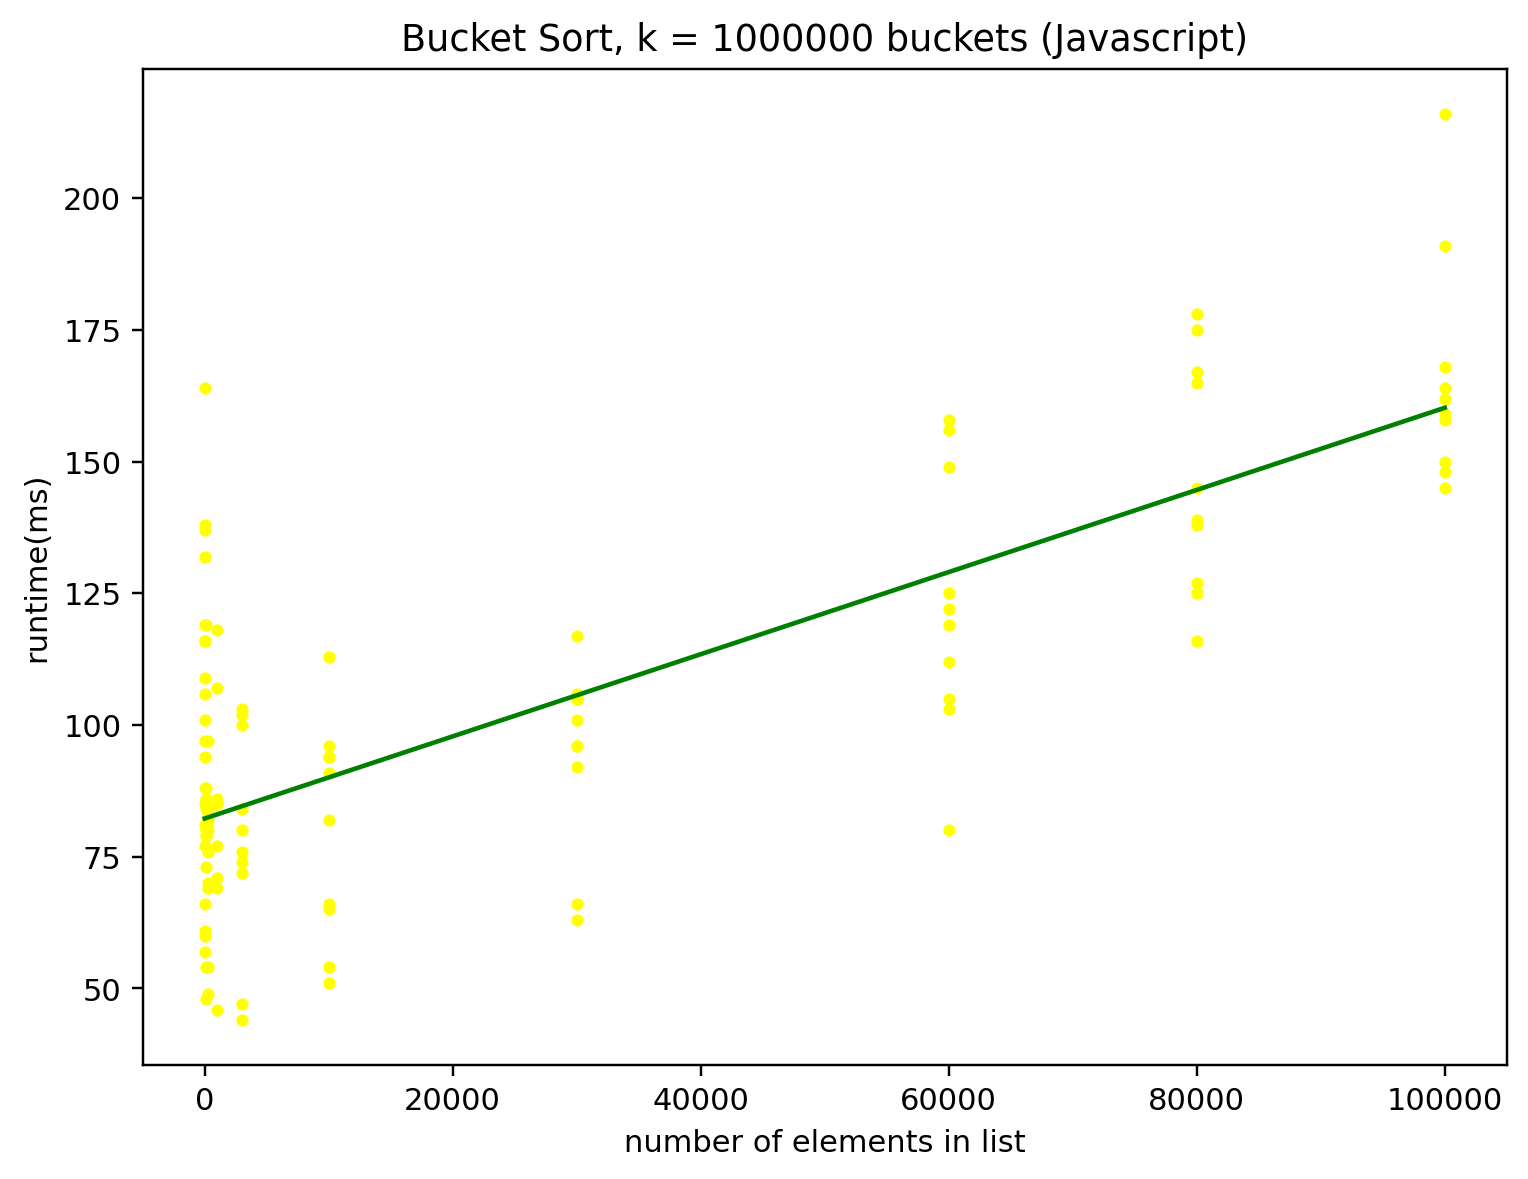

In [139]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import *
%matplotlib inline

figure1000 = plt.figure(dpi=220, figsize=(8,6))
figure3000 = plt.figure(dpi=220, figsize=(8,6))
figure10000 = plt.figure(dpi=220, figsize=(8,6))
figure30000 = plt.figure(dpi=220, figsize=(8,6))
figure100000 = plt.figure(dpi=220, figsize=(8,6))
figure300000 = plt.figure(dpi=220, figsize=(8,6))
figure1000000 = plt.figure(dpi=220, figsize=(8,6))

axis1000 = figure1000.add_subplot(111)
axis3000 = figure3000.add_subplot(111)
axis10000 = figure10000.add_subplot(111)
axis30000 = figure30000.add_subplot(111)
axis100000 = figure100000.add_subplot(111)
axis300000 = figure300000.add_subplot(111)
axis1000000 = figure1000000.add_subplot(111)

axis1000.set(xlabel = "number of elements in list", ylabel="runtime(ms)",
         title = "Bucket Sort, k = 1000 buckets (Javascript)")
axis3000.set(xlabel = "number of elements in list", ylabel="runtime(ms)",
         title = "Bucket Sort, k = 3000 buckets (Javascript)")
axis10000.set(xlabel = "number of elements in list", ylabel="runtime(ms)",
         title = "Bucket Sort, k = 10000 buckets (Javascript)")
axis30000.set(xlabel = "number of elements in list", ylabel="runtime(ms)",
         title = "Bucket Sort, k = 30000 buckets (Javascript)")
axis100000.set(xlabel = "number of elements in list", ylabel="runtime(ms)",
         title = "Bucket Sort, k = 100000 buckets (Javascript)")
axis300000.set(xlabel = "number of elements in list", ylabel="runtime(ms)",
         title = "Bucket Sort, k = 300000 buckets (Javascript)")
axis1000000.set(xlabel = "number of elements in list", ylabel="runtime(ms)",
         title = "Bucket Sort, k = 1000000 buckets (Javascript)")

# i originally planned to plot these all on the same graph, but it was visually too messy
axis1000.plot(elements1000, runtime1000, marker = ".", color="red", linestyle="none")
axis3000.plot(elements3000, runtime3000, marker = ".", color="blue", linestyle="none")
axis10000.plot(elements10000, runtime10000, marker = ".", color="orange", linestyle="none")
axis30000.plot(elements30000, runtime30000, marker = ".", color="green", linestyle="none")
axis100000.plot(elements100000, runtime100000, marker = ".", color="pink", linestyle="none")
axis300000.plot(elements300000, runtime300000, marker = ".", color="purple", linestyle="none")
axis1000000.plot(elements1000000, runtime1000000, marker = ".", color="yellow", linestyle="none")

plt.xscale("linear")
plt.yscale("linear")

fit1000y = linReg(elements1000, runtime1000)
axis1000.plot(elements1000, fit1000y, 'g')
fit3000y = linReg(elements3000, runtime3000)
axis3000.plot(elements3000, fit3000y, 'r')
fit10000y = linReg(elements10000, runtime10000)
axis10000.plot(elements10000, fit10000y, 'g')
fit30000y = linReg(elements30000, runtime30000)
axis30000.plot(elements30000, fit30000y, 'r')
fit100000y = linReg(elements100000, runtime100000)
axis100000.plot(elements100000, fit100000y, 'g')
fit300000y = linReg(elements300000, runtime300000)
axis300000.plot(elements300000, fit300000y, 'r')
fit1000000y = linReg(elements1000000, runtime1000000)
axis1000000.plot(elements1000000, fit1000000y, 'g')
plt.show()


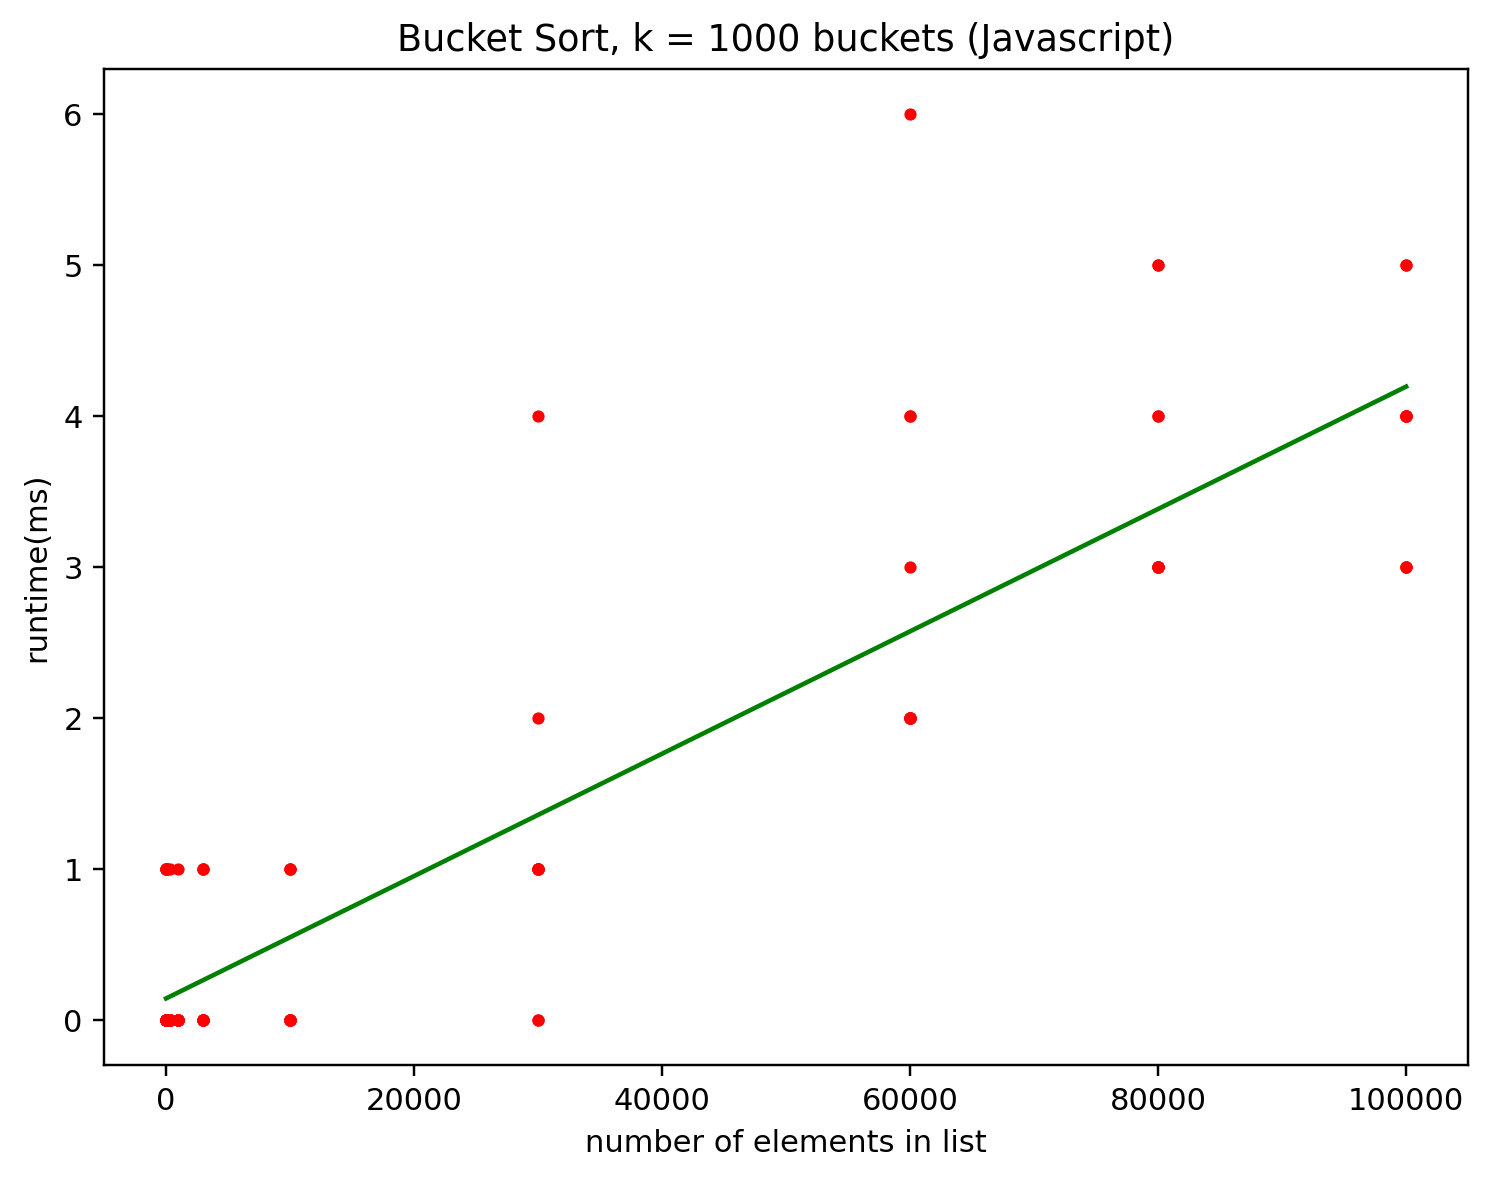

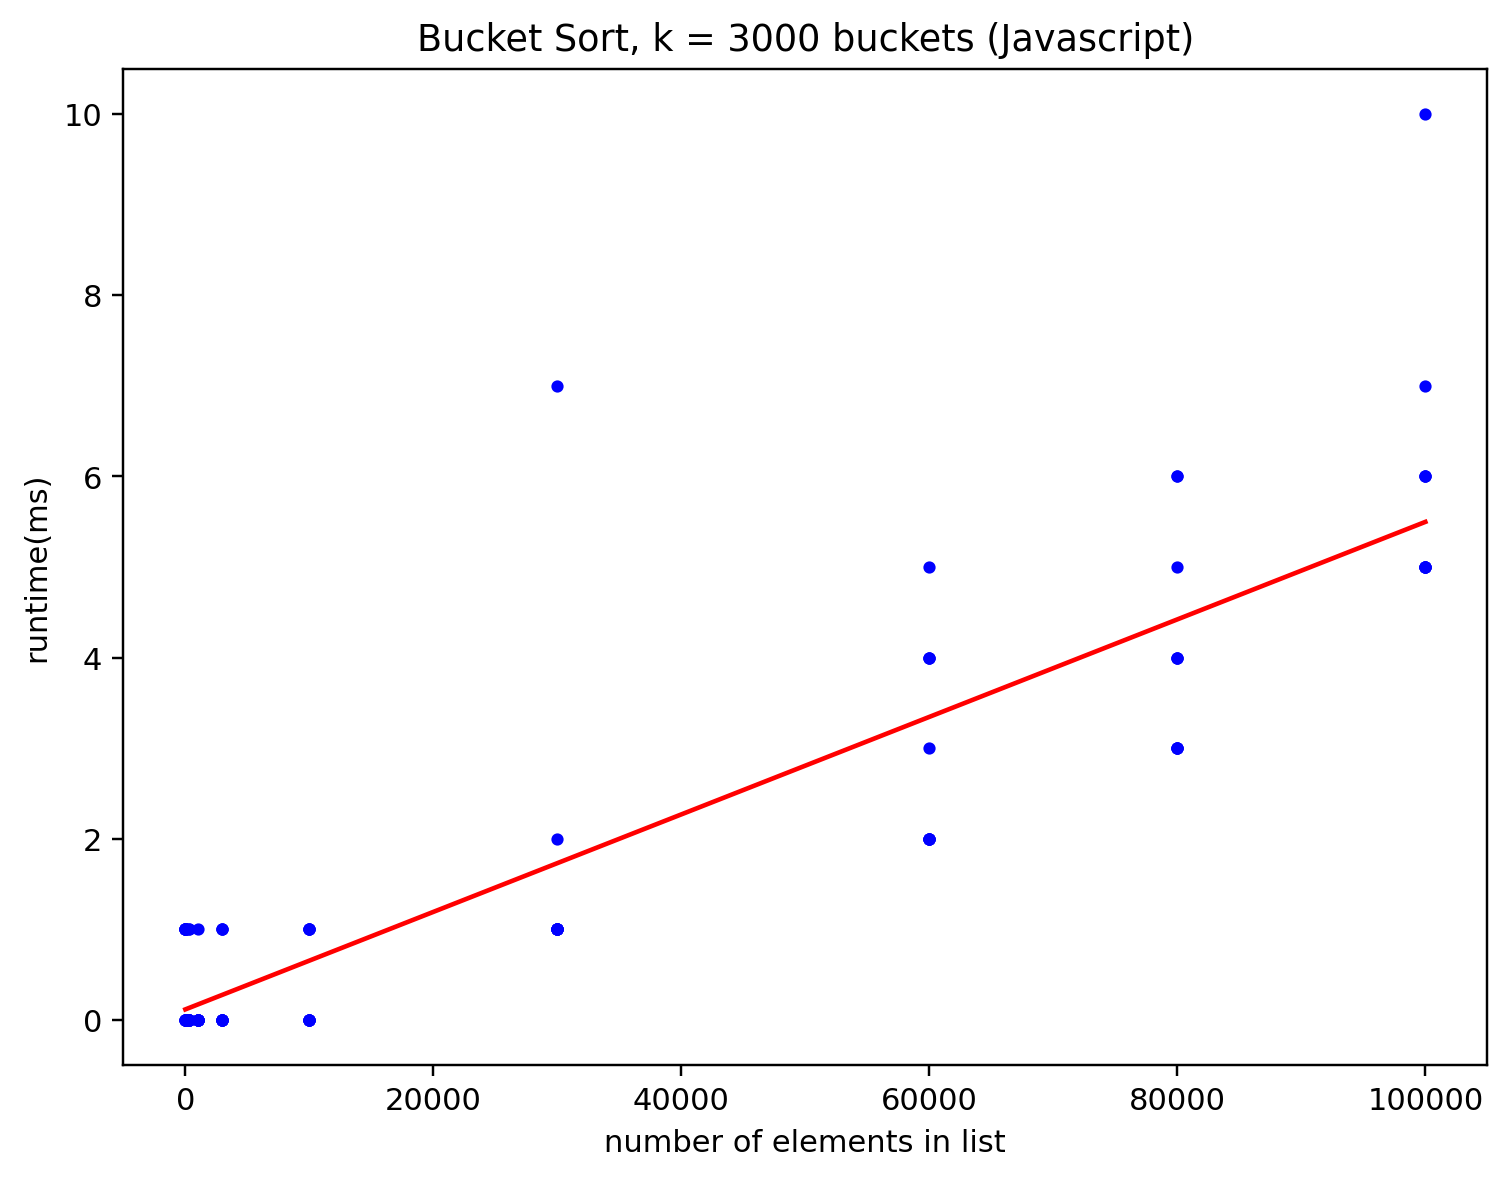

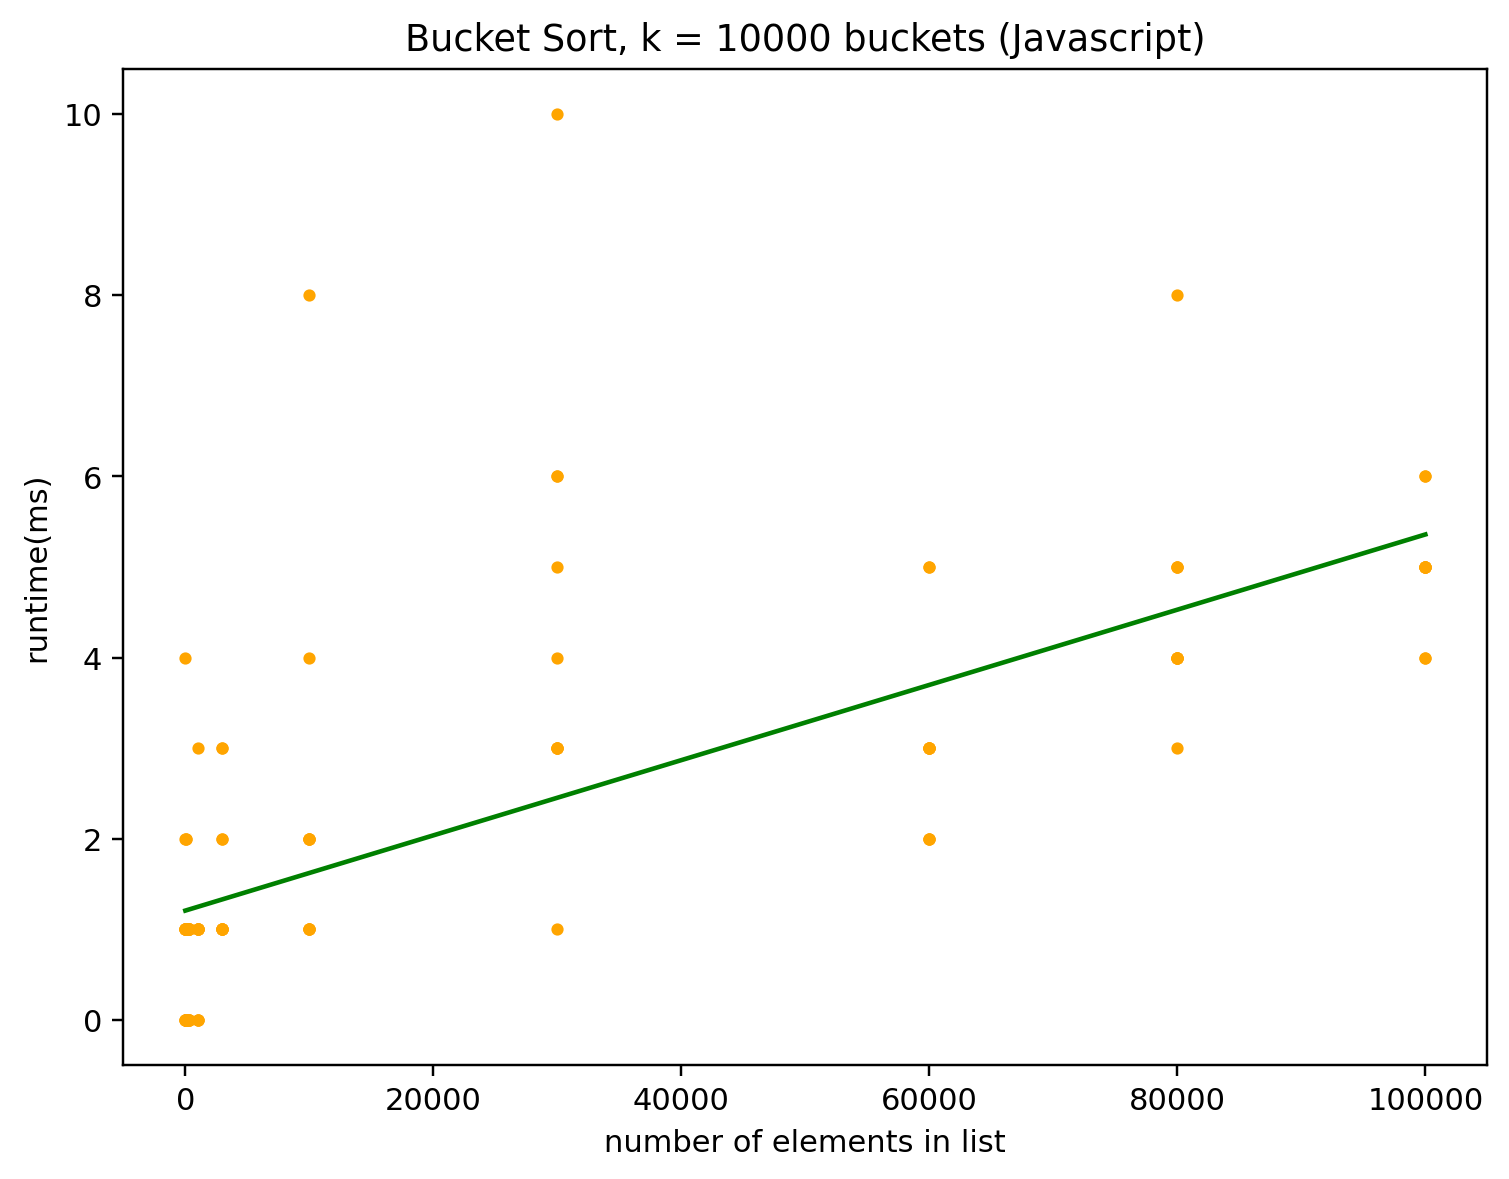

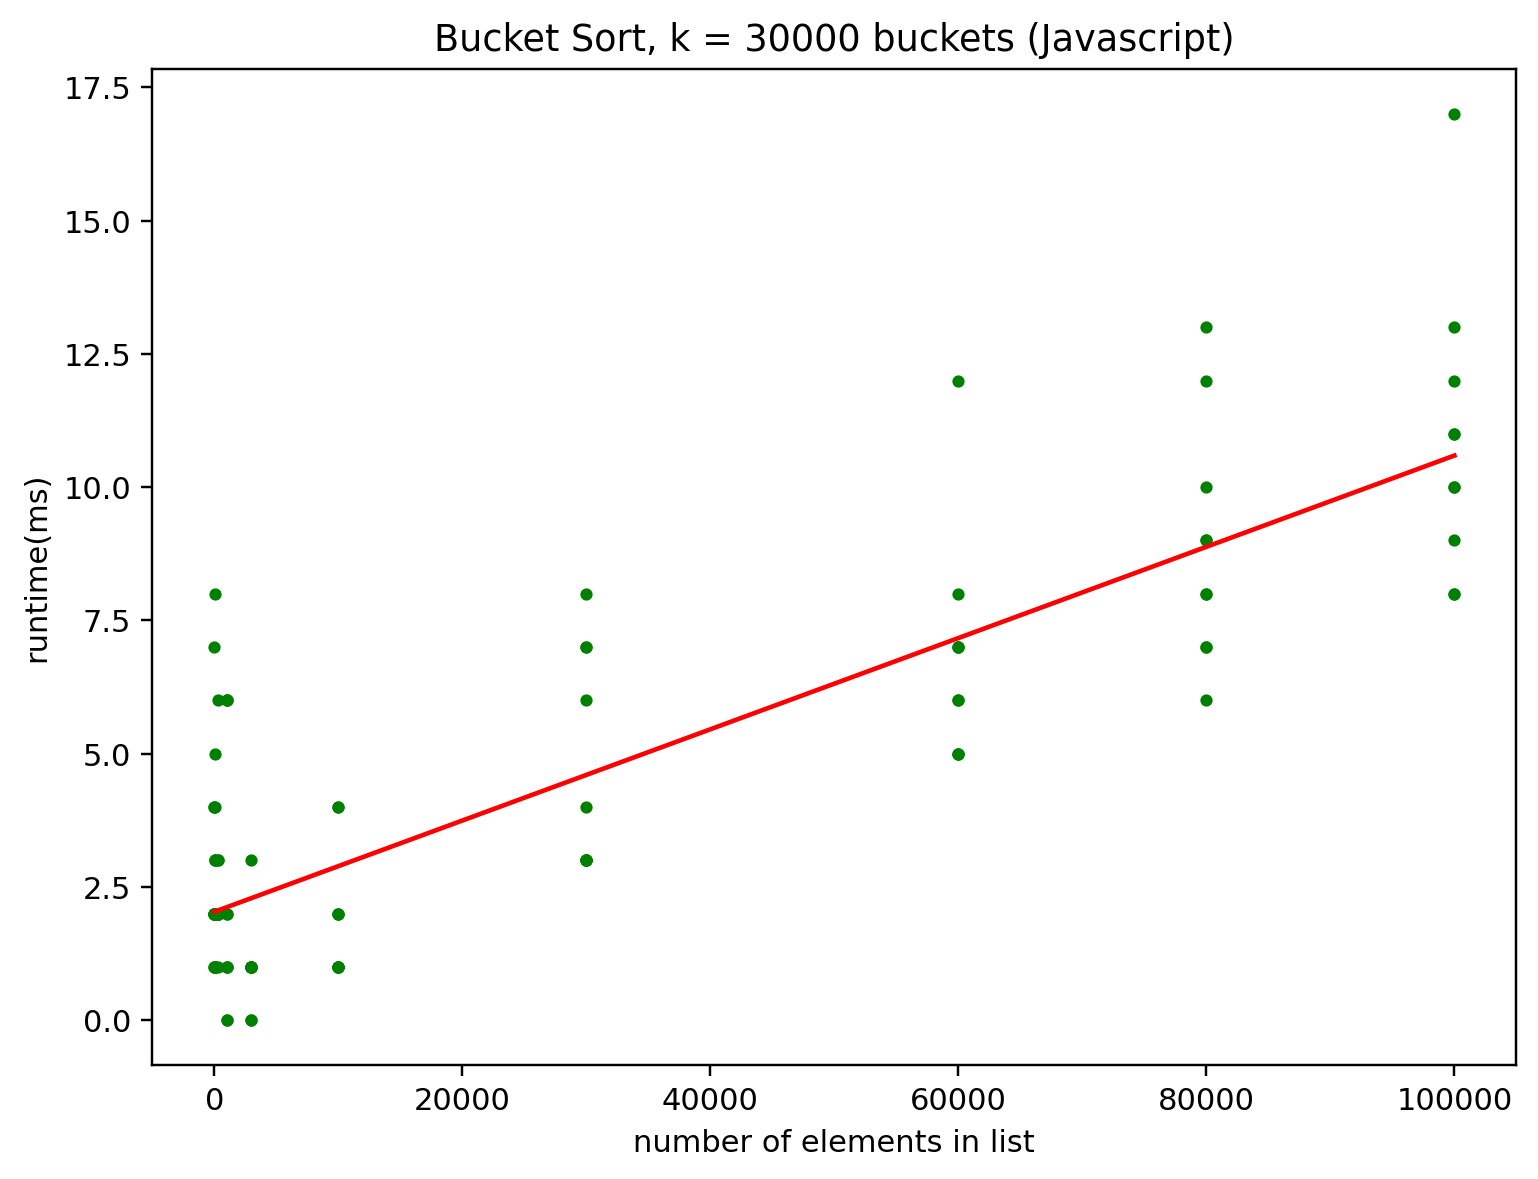

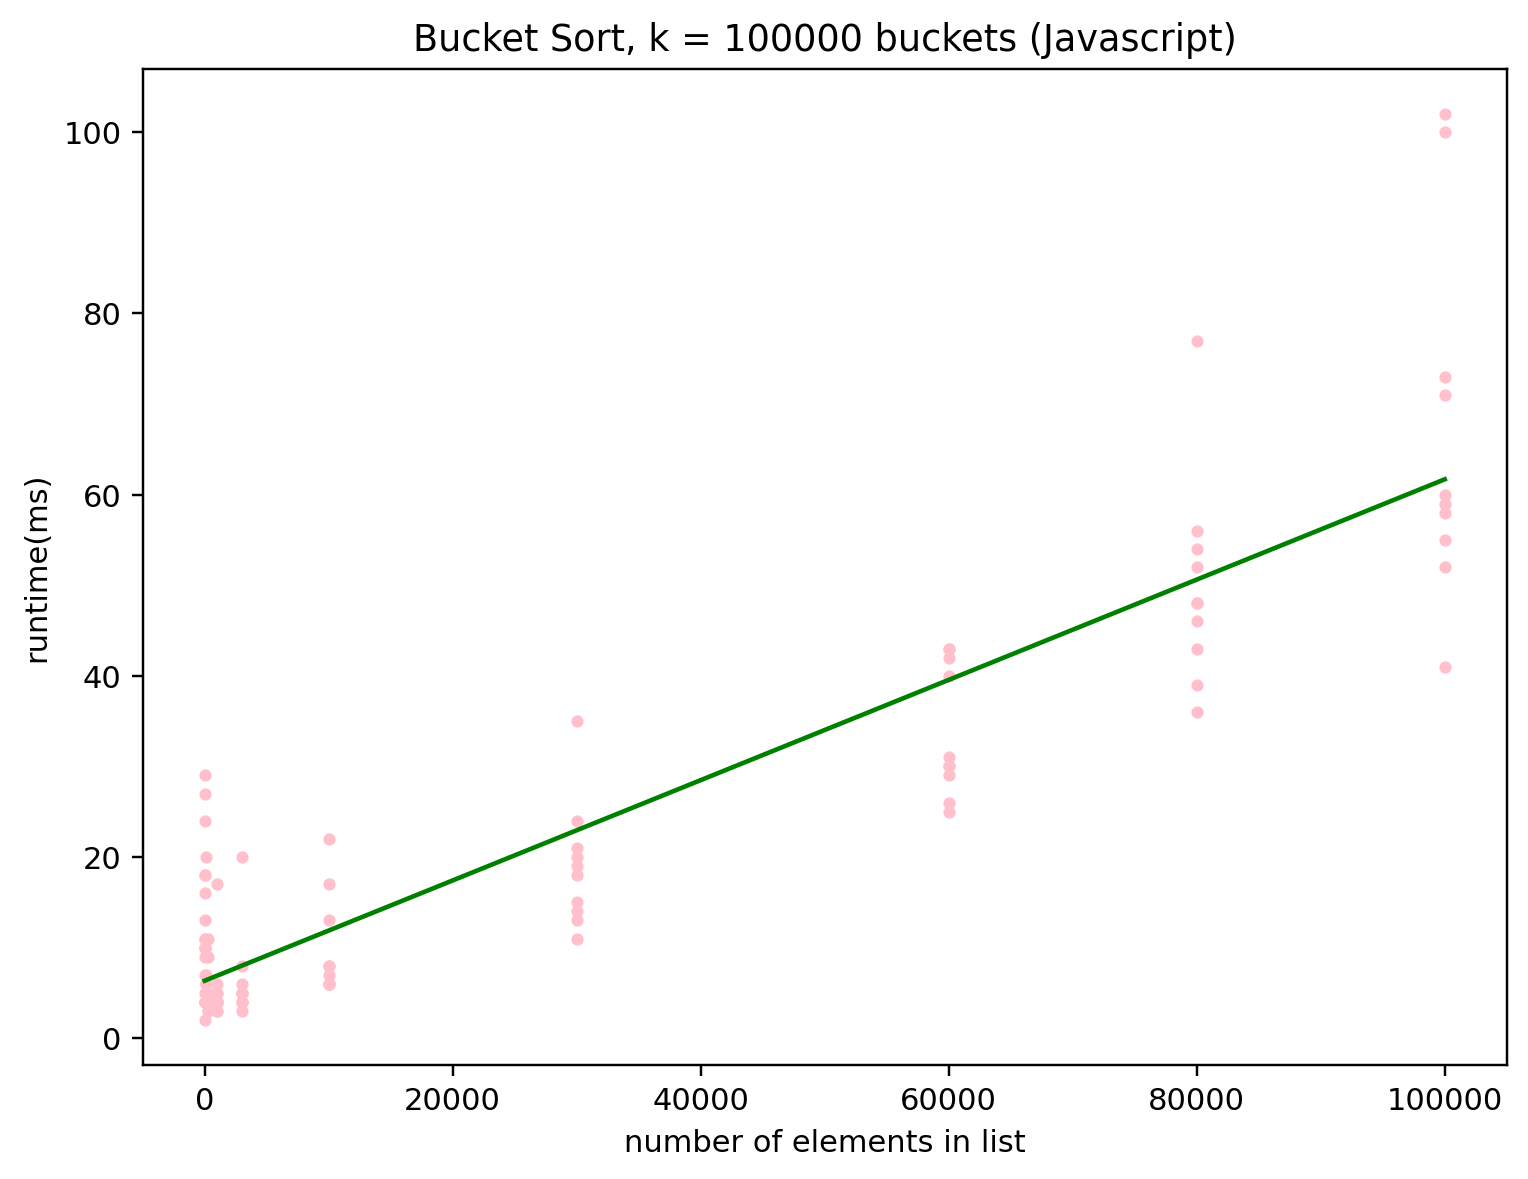

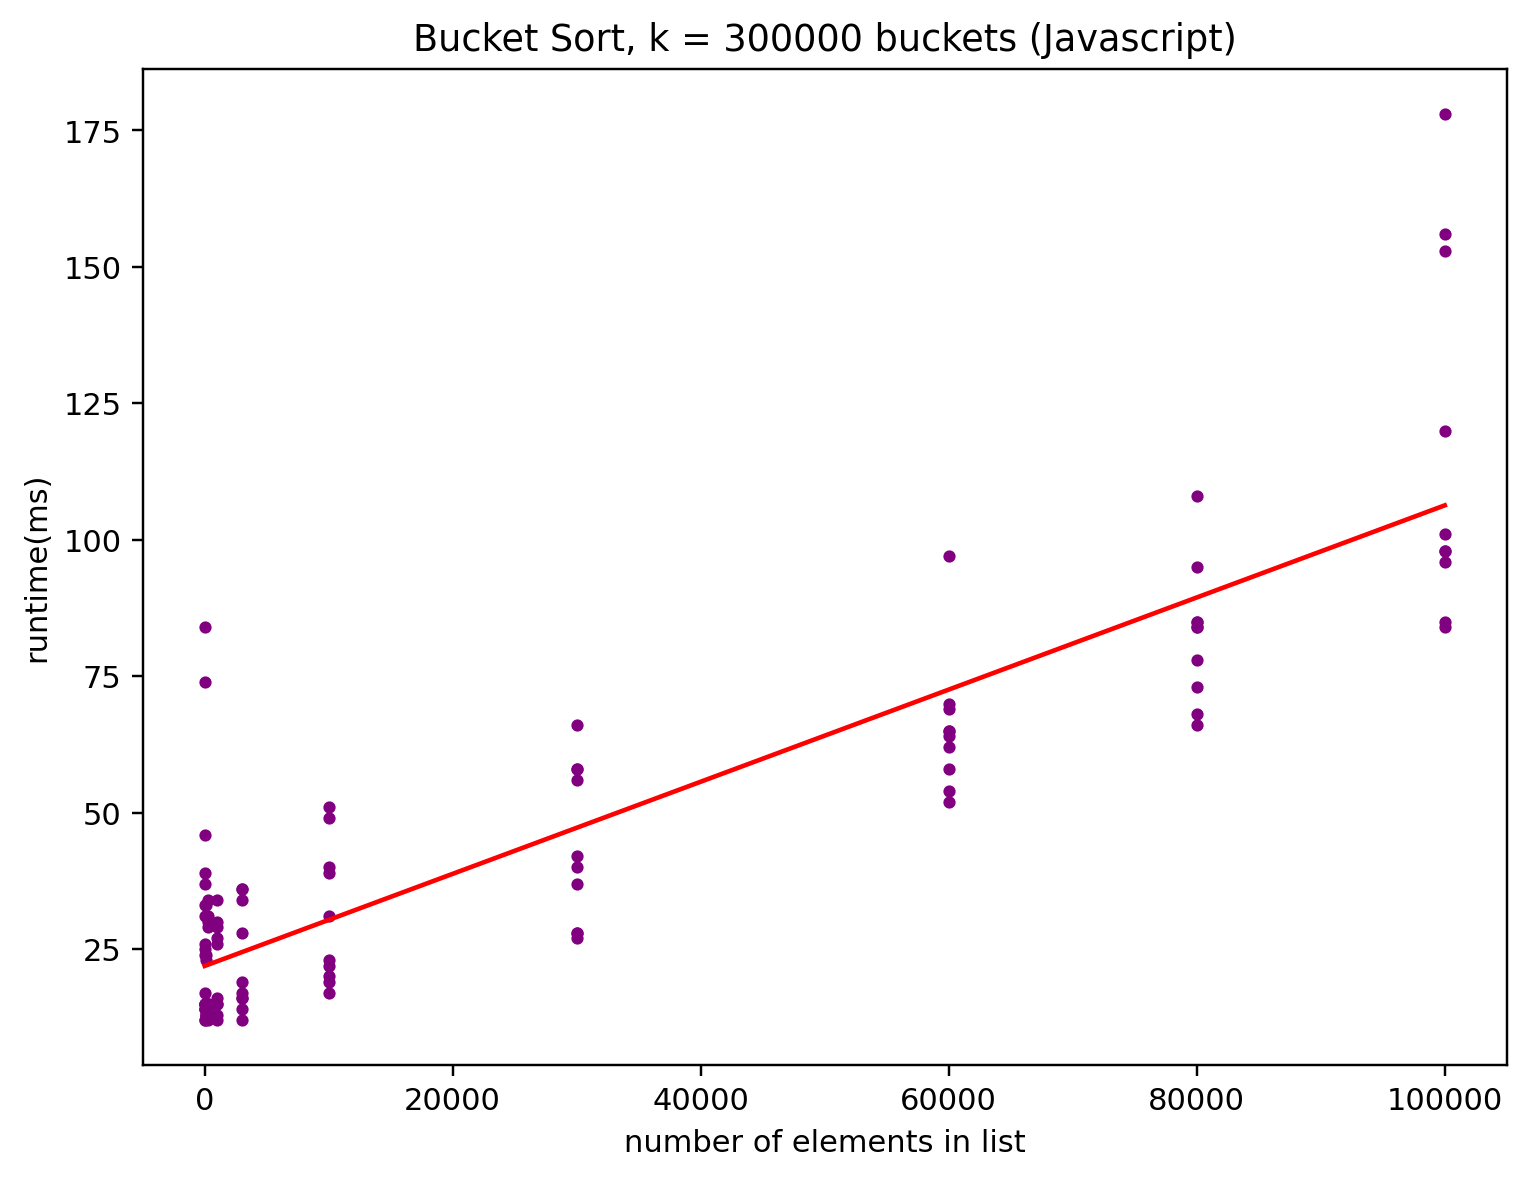

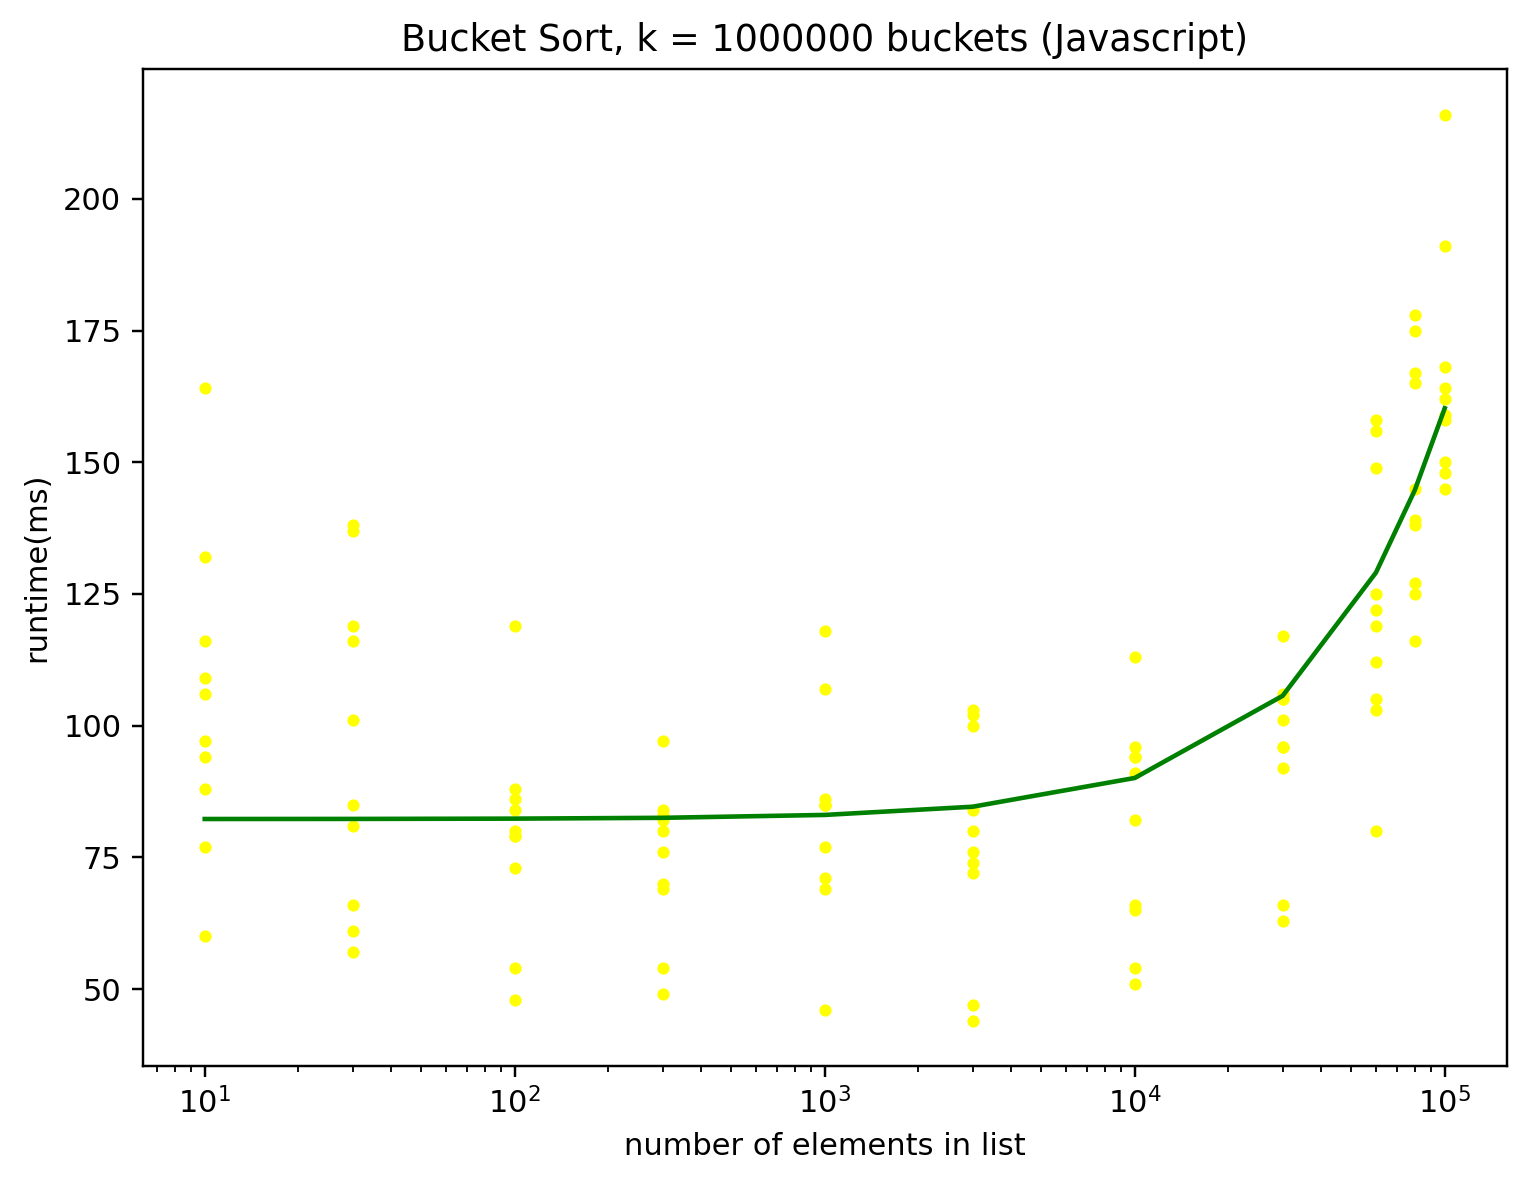

In [141]:
figure1000 = plt.figure(dpi=220, figsize=(8,6))
figure3000 = plt.figure(dpi=220, figsize=(8,6))
figure10000 = plt.figure(dpi=220, figsize=(8,6))
figure30000 = plt.figure(dpi=220, figsize=(8,6))
figure100000 = plt.figure(dpi=220, figsize=(8,6))
figure300000 = plt.figure(dpi=220, figsize=(8,6))
figure1000000 = plt.figure(dpi=220, figsize=(8,6))

axis1000 = figure1000.add_subplot(111)
axis3000 = figure3000.add_subplot(111)
axis10000 = figure10000.add_subplot(111)
axis30000 = figure30000.add_subplot(111)
axis100000 = figure100000.add_subplot(111)
axis300000 = figure300000.add_subplot(111)
axis1000000 = figure1000000.add_subplot(111)

axis1000.set(xlabel = "number of elements in list", ylabel="runtime(ms)",
         title = "Bucket Sort, k = 1000 buckets (Javascript)")
axis3000.set(xlabel = "number of elements in list", ylabel="runtime(ms)",
         title = "Bucket Sort, k = 3000 buckets (Javascript)")
axis10000.set(xlabel = "number of elements in list", ylabel="runtime(ms)",
         title = "Bucket Sort, k = 10000 buckets (Javascript)")
axis30000.set(xlabel = "number of elements in list", ylabel="runtime(ms)",
         title = "Bucket Sort, k = 30000 buckets (Javascript)")
axis100000.set(xlabel = "number of elements in list", ylabel="runtime(ms)",
         title = "Bucket Sort, k = 100000 buckets (Javascript)")
axis300000.set(xlabel = "number of elements in list", ylabel="runtime(ms)",
         title = "Bucket Sort, k = 300000 buckets (Javascript)")
axis1000000.set(xlabel = "number of elements in list", ylabel="runtime(ms)",
         title = "Bucket Sort, k = 1000000 buckets (Javascript)")

# i originally planned to plot these all on the same graph, but it was visually too messy
axis1000.plot(elements1000, runtime1000, marker = ".", color="red", linestyle="none")
axis3000.plot(elements3000, runtime3000, marker = ".", color="blue", linestyle="none")
axis10000.plot(elements10000, runtime10000, marker = ".", color="orange", linestyle="none")
axis30000.plot(elements30000, runtime30000, marker = ".", color="green", linestyle="none")
axis100000.plot(elements100000, runtime100000, marker = ".", color="pink", linestyle="none")
axis300000.plot(elements300000, runtime300000, marker = ".", color="purple", linestyle="none")
axis1000000.plot(elements1000000, runtime1000000, marker = ".", color="yellow", linestyle="none")

plt.xscale("log")
plt.yscale("linear")

fit1000y = linReg(elements1000, runtime1000)
axis1000.plot(elements1000, fit1000y, 'g')
fit3000y = linReg(elements3000, runtime3000)
axis3000.plot(elements3000, fit3000y, 'r')
fit10000y = linReg(elements10000, runtime10000)
axis10000.plot(elements10000, fit10000y, 'g')
fit30000y = linReg(elements30000, runtime30000)
axis30000.plot(elements30000, fit30000y, 'r')
fit100000y = linReg(elements100000, runtime100000)
axis100000.plot(elements100000, fit100000y, 'g')
fit300000y = linReg(elements300000, runtime300000)
axis300000.plot(elements300000, fit300000y, 'r')
fit1000000y = linReg(elements1000000, runtime1000000)
axis1000000.plot(elements1000000, fit1000000y, 'g')
plt.show()

For many of the trials run, the relationship between the number of elements and the runtime seems fairly linear, more representative of what would be called O(n) behavior. In fact, the only case in which the bucket sort began to deviate from linear behavior is in the case where there are 1000000 buckets; While the lin-lin plot looks relatively linear, viewing the final plot on a log-log scale reveals that there is actually a sharp uptick in runtime as the number of elements reaches 10<sup>5</sup>. The runtime began to increase harshly, shooting from under 10<sup>2</sup> milliseconds to 2 x 10<sup>2</sup> milliseconds as the number of elements increased by two orders of magnitude. Even beyond this average, some outliers appear to reach even further than 200ms. 

This particular calculation, combined with the mostly linear graphs presented above, leads me to believe that the bucket sort algorithm performs well on sets of data where there's a relatively small range of possible values because the number of buckets is determined by the range. Even with this caveat, It seems that, even at extremely wide ranges and extremely high numbers of elements, that the bucket sort far outperforms the bubble sort. Consider the fact that, even with 10<sup>5</sup> elements and 10<sup>6</sup> buckets, the runtime only broke 150 milliseconds on average, while the average run time for a bucket sort on a list with 10<sup>5</sup> elements is 250 seconds; this is magnitudes slower than the bucket sort!